In [1]:
import pandas as pd # Импорт библиотеки pandas для работы с табличными данными
import seaborn as sns # Импорт библиотеки seaborn для создания визуализаций данных
import numpy as np # Импорт библиотеки numpy для работы с массивами и числовыми операциями
from matplotlib import pyplot as plt # Импорт функции pyplot из библиотеки matplotlib для создания графиков и визуализаций
from datetime import datetime, date # Импорт библиотеки для работы с датой и временем

from sklearn.model_selection import train_test_split  # Импорт функции для разбиения данных на тренировочную и тестовую выборки
from sklearn.model_selection import GridSearchCV # Импорт модели решётчатого поиска гиперпараметров
from sklearn.linear_model import LogisticRegression # Импорт модели логистической регрессии
from sklearn.tree import DecisionTreeClassifier # Импорт модели дерева решений
from sklearn.ensemble import RandomForestClassifier # Импорт модели случайного леса

from sklearn import preprocessing # Импорт библиотеки preprocessing

import sklearn.metrics # Импорт модуля для работы с метриками оценки моделей
from sklearn.metrics import classification_report # Импорт функции для создания сводки качества классификации
from sklearn.metrics import confusion_matrix # Импорт функции для создания матрицы ошибок

import warnings # Уберем предупреждения, чтобы они не загромождали вывод.
warnings.filterwarnings('ignore')

In [2]:
# Открываем данные.
project_df = pd.read_csv('undefind.csv', sep=';')
project_df

,ID истории болезни,Осн. диаг. при выписке МКБ10 (текст),Заголовок документа,Кол. лаб. показатель,Значение кол. показателя,Ед. изм. кол. показателя,Норма кол. показателя,Флаг нормы кол. показателя,Кач. лаб. показатель,Значение кач. показателя,Норма кач. показателя,Пол,Дата рождения пациента
0,2e1d0b3f-488a-11ed-ab5a-0050568844e6,Плазмоклеточный лейкоз,Общий анализ крови,Лейкоциты (WBC),1.80,10*9/л,4:11,Пониж,NaN,NaN,NaN,Ж,1962-09-22 00:00:00
1,2e1d0b3f-488a-11ed-ab5a-0050568844e6,Плазмоклеточный лейкоз,Общий анализ крови,Эритроциты (RBC),4.18,10*12/л,"3,8:5,7",Норм,NaN,NaN,NaN,Ж,1962-09-22 00:00:00
2,2e1d0b3f-488a-11ed-ab5a-0050568844e6,Плазмоклеточный лейкоз,Общий анализ крови,Гемоглобин (HGB),120.00,г/л,117:160,Норм,NaN,NaN,NaN,Ж,1962-09-22 00:00:00
3,2e1d0b3f-488a-11ed-ab5a-0050568844e6,Плазмоклеточный лейкоз,Общий анализ крови,Гематокрит (HCT),35.10,%,35:47,Норм,NaN,NaN,NaN,Ж,1962-09-22 00:00:00
4,2e1d0b3f-488a-11ed-ab5a-0050568844e6,Плазмоклеточный лейкоз,Общий анализ крови,Средний объем эритроцита (MCV),84.00,фл,80:99,Норм,NaN,NaN,NaN,Ж,1962-09-22 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36292,516f652e-8bb8-11eb-bb95-2cea7fe73f75,Острый лейкоз неуточненного клеточного типа,Общий анализ крови,Базофилы,1.00,%,0:2,Норм,Комментарий,Тромбоциты проверены. Рекомендована консультац...,_,М,2014-10-17 00:00:00
36293,516f652e-8bb8-11eb-bb95-2cea7fe73f75,Острый лейкоз неуточненного клеточного типа,Общий анализ крови,Эозинофилы,0.00,%,0:5,Норм,Комментарий,Тромбоциты проверены. Рекомендована консультац...,_,М,2014-10-17 00:00:00
36294,516f652e-8bb8-11eb-bb95-2cea7fe73f75,Острый лейкоз неуточненного клеточного типа,Общий анализ крови,Пролимфоциты,0.00,%,0:0,Норм,Комментарий,Тромбоциты проверены. Рекомендована консультац...,_,М,2014-10-17 00:00:00
36295,516f652e-8bb8-11eb-bb95-2cea7fe73f75,Острый лейкоз неуточненного клеточного типа,Общий анализ крови,Лимфоциты,65.00,%,18:44,Повыш,Комментарий,Тромбоциты проверены. Рекомендована консультац...,_,М,2014-10-17 00:00:00


# <center>Разведочный анализ данных (EDA) и предобработка данных</center>

## Оценка общей информации по признакам

In [3]:
# Посмотрим информацию о признаках.
project_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36297 entries, 0 to 36296
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID истории болезни                    36297 non-null  object 
 1   Осн. диаг. при выписке МКБ10 (текст)  36297 non-null  object 
 2   Заголовок документа                   36297 non-null  object 
 3   Кол. лаб. показатель                  36236 non-null  object 
 4   Значение кол. показателя              36236 non-null  float64
 5   Ед. изм. кол. показателя              36236 non-null  object 
 6   Норма кол. показателя                 36236 non-null  object 
 7   Флаг нормы кол. показателя            36236 non-null  object 
 8   Кач. лаб. показатель                  7005 non-null   object 
 9   Значение кач. показателя              7005 non-null   object 
 10  Норма кач. показателя                 7005 non-null   object 
 11  Пол            

In [4]:
# Выведем кол-во пропущенных значений в каждом признаке.
project_df.isna().sum()

ID истории болезни                          0
Осн. диаг. при выписке МКБ10 (текст)        0
Заголовок документа                         0
Кол. лаб. показатель                       61
Значение кол. показателя                   61
Ед. изм. кол. показателя                   61
Норма кол. показателя                      61
Флаг нормы кол. показателя                 61
Кач. лаб. показатель                    29292
Значение кач. показателя                29292
Норма кач. показателя                   29292
Пол                                         0
Дата рождения пациента                      0
dtype: int64

In [5]:
# Выведем названия всех признаков в таблице.
project_df.columns

Index(['ID истории болезни', 'Осн. диаг. при выписке МКБ10 (текст)',
       'Заголовок документа', 'Кол. лаб. показатель',
       'Значение кол. показателя', 'Ед. изм. кол. показателя',
       'Норма кол. показателя', 'Флаг нормы кол. показателя',
       'Кач. лаб. показатель', 'Значение кач. показателя',
       'Норма кач. показателя', 'Пол', 'Дата рождения пациента'],
      dtype='object')

In [6]:
# Выведем количество уникальных значений в каждой колонке в таблице
project_df.nunique()

ID истории болезни                       243
Осн. диаг. при выписке МКБ10 (текст)      11
Заголовок документа                        1
Кол. лаб. показатель                     131
Значение кол. показателя                2608
Ед. изм. кол. показателя                  11
Норма кол. показателя                    123
Флаг нормы кол. показателя                 4
Кач. лаб. показатель                       7
Значение кач. показателя                 155
Норма кач. показателя                      5
Пол                                        2
Дата рождения пациента                   104
dtype: int64

## Признак 'Заголовок документа'

* Всего одно уникальное значение. Неинформативный признак. Сразу от него избавимся.

In [7]:
# Избавимся от признака `Заголовок документа`.
project_df = project_df.drop(labels='Заголовок документа', axis=1)

## Признак 'ID истории болезни'

In [8]:
project_df['ID истории болезни'].value_counts()

ID истории болезни
c1f452ff-d091-11ee-8606-005056880ecb    662
ffa72572-f065-11ec-ab56-0050568844e6    638
70076ff2-f7da-11ee-ab6f-0050568844e6    628
d13aae4f-a605-11ed-ab61-0050568844e6    593
51c51145-0c57-11ef-8607-005056880ecb    514
                                       ... 
b86cafe6-6a6c-11ea-80cd-901b0e633689     26
4dd6bc50-2fe4-11ec-bb98-2cea7fe73f75     25
d13f240e-4d5b-11ea-80c8-901b0e63368a     24
5bcdbef9-efcf-11ed-8604-005056880ecb     23
70f64d47-d5c1-11e9-80bb-901b0e633689      1
Name: count, Length: 243, dtype: int64

* В датасете присутствуют данные 243 историй болезней. При этом на каждую историю болезни приходится разное суммарное количество анализов. Для начала заменим все сложные шифровки просто числом

In [9]:
# Присвоим каждому ID и/б своё число.
id_list = list(project_df['ID истории болезни'].unique())
project_df['ID истории болезни'] = project_df['ID истории болезни'].map(lambda x: id_list.index(x))

## Признак 'Кол. лаб. показатель'

In [10]:
# Посмотрим все уникальные значения в признаке `Кол. лаб. показатель`.
project_df['Кол. лаб. показатель'].unique()

array(['Лейкоциты (WBC)', 'Эритроциты (RBC)', 'Гемоглобин (HGB)',
       'Гематокрит (HCT)', 'Средний объем эритроцита (MCV)',
       'Среднее содержание гемоглобина в эритроците (MCH)',
       'Средняя концентрация гемоглобина в эритроците (MCHC)',
       'Тромбоциты (PLT)', 'Нейтрофилы, относительное количество (NE%)',
       'Лимфоциты, относительное количество (LY%)',
       'Нейтрофилы, абсолютное количество (NE#)',
       'Лимфоциты, абсолютное количество (LY#)',
       'Смешанная фракция, абсолютное количество (MXD#)',
       'Смешанная фракция, относительное количество (MXD%)',
       'Ширина распределения эритроцитов по объему, коэффициент вариации (RDW-CV)',
       'Ширина распределения эритроцитов по объему, стандартное отклонение (RDW-SD)',
       'Ширина распределения эритроцитов по объему (RDW)',
       'Тромбокрит (PCT)', 'Средний объем тромбоцита (MPV)',
       'Ширина распределения тромбоцитов (PDW)',
       'Моноциты, относительное количество (MO%)',
       'Эозинофил

In [11]:
# Словарь синонимов
replace_dict = {
  'WBC': ['Лейкоциты (WBC)', 'Лейкоциты', 'Общее количество лейкоцитов (WBC)'],
  'RBC': ['Эритроциты (RBC)', 'Эритроциты', 'Общее количество эритроцитов (RBC)'],
  'HGB': ['Гемоглобин (HGB)', 'Гемоглобин'],
  'HCT': ['Гематокрит (HCT)', 'Гематокрит'],
  'PCT': ['Тромбокрит (PCT)', 'Тромбокрит', 'PCT'],
  'PLT': ['Тромбоциты (PLT)', 'Тромбоциты'],
  'MCV': ['Средний объем эритроцита (MCV)', 'Средний объем эритроцита'],
  'MCH': ['Среднее содержание гемоглобина в эритроците (MCH)', 'Среднее содержание гемоглобина в эритроците'],    
  'MCHC': ['Средняя концентрация гемоглобина в эритроците (MCHC)', 'Средняя концентрация гемоглобина в эритроците'],
  'RDW': ['Ширина распределения эритроцитов (RDW)','Ширина распределения эритроцитов','Ширина распределения эритроцитов по объему (RDW)', 'RDW'],
  'RDW-CV': ['Ширина распределения эритроцитов по объему, коэффициент вариации (RDW-CV)', 'Ширина распределения эритроцитов по объему, коэффициент вариации', 'RDW-CV ', 'RDW-CV'],
  'RDW-SD': ['Ширина распределения эритроцитов по объему, стандартное отклонение (RDW-SD)', 'Ширина распределения эритроцитов по объему, стандартное отклонение', 'RDW-SD', 'Ширина распределения эритроцитов, стандартное отклонение (RDW-SD)'], 
  'RET%': ['Ретикулоциты %'],
  'RET#': ['Ретикулоциты кол-во'],
  'ESR': ['СОЭ Панч', 'Скорость оседания эритроцитов (СОЭ)', 'СОЭ Панч.', 'СОЭ Вест.', 'Скорость оседания эритроцитов (СОЭ) по Вестергрену', 'СОЭ по Панченкову'],
  'CI': ['Цветовой показатель'],  
  'NE%': ['Нейтрофилы, относительное количество (NE%)', 'Относительное количество нейтрофилов (NE%)', 'Нейтрофилы %', 'Нейтрофилы, относительное количество'],
  'NE%S': ['Сегментоядерные'],
  'NE%YY': ['Юные'],
  'NE%Y': ['Палочкоядерные'],
  'LY%': ['Лимфоциты, относительное количество (LY%)', 'Относительное количество лимфоцитов (LY%)', 'Лимфоциты %', 'Лимфоциты, относительное количество'],
  'LY': ['Лимфоциты'], 
  'NE#': ['Нейтрофилы, абсолютное количество (NE#)', 'Абсолютное количество нейтрофилов (NE#)', 'Нейтрофилы #', 'Нейтрофилы, абсолютное количество'],
  'LY#': ['Лимфоциты, абсолютное количество (LY#)', 'Абсолютное количество лимфоцитов (LY#)', 'Лимфоциты #', 'Лимфоциты, абсолютное количество'],
  'MXD#': ['Смешанная фракция, абсолютное количество (MXD#)', 'Смешанная фракция, абсолютное количество', 'MXD#', 'MXD# ', 'Неклассифицируемые кол-во', 'MXD'],
  'MXD%': ['Смешанная фракция, относительное количество (MXD%)', 'Смешанная фракция, относительное количество', 'MXD%', 'Неклассифицируемые %'],  
  'MPV': ['Средний объем тромбоцита (MPV)', 'Средний объём тромбоцитов', 'MPV (Средний объём тромбоцитов)', 'MPV', 'Средний объем тромбоцита', 'MPV '],
  'PDW': ['Ширина распределения тромбоцитов (PDW)', 'Ширина распределения тромбоцитов по объему', 'PDW', 'Ширина распределения тромбоцитов'],   
  'MO%': ['Моноциты, относительное количество (MO%)', 'Относительное количество моноцитов (MO%)', 'Моноциты %', 'MO%', 'Моноциты, относительное количество'],
  'MO': ['Моноциты'],
  'EO': ['Эозинофилы'], 
  'EO%': ['Эозинофилы, относительное количество (EO%)', 'Относительное количество эозинофилов (EO%)', 'Эозинофилы %', 'EO%', 'Эозинофилы, относительное количество'],    
  'BA%': ['Базофилы, относительное количество (BA%)', 'Относительное количество базофилов (BA%)', 'Базофилы %', 'BA%', 'Базофилы', 'Базофилы, относительное количество'],
  'MO#': ['Моноциты, абсолютное количество (MO#)', 'Абсолютное количество моноцитов (MO#)', 'Моноциты #', 'MO#', 'Моноциты, абсолютное количество'],
  'EO#': ['Эозинофилы, абсолютное количество (EO#)', 'Абсолютное количество эозинофилов (EO#)', 'Эозинофилы #', 'EO#', 'Эозинофилы # ', 'Эозинофилы, абсолютное количество', 'Эозинофилы # '],
  'BA#': ['Базофилы, абсолютное количество (BA#)', 'Абсолютное количество базофилов (BA#)', 'Базофилы #', 'BA#', 'Базофилы # ', 'Базофилы, абсолютное количество', 'Базофилы # '],
  'Atypical cells': ['Плазматич. клетки', 'Плазматические клетки', 'Миелоциты','Промиелоциты', 'Пролимфоциты', 'Бласты','Нормобласты', 'Нормобласты #', 'Нормобласты %']
}
# Стандартизуем названия лабораторных показателей
for new_val, old_vals in replace_dict.items(): 
    project_df['Кол. лаб. показатель'] = project_df['Кол. лаб. показатель'].replace(old_vals, new_val)

# Проверка как прошла замена
project_df['Кол. лаб. показатель'].unique()

array(['WBC', 'RBC', 'HGB', 'HCT', 'MCV', 'MCH', 'MCHC', 'PLT', 'NE%',
       'LY%', 'NE#', 'LY#', 'MXD#', 'MXD%', 'RDW-CV', 'RDW-SD', 'RDW',
       'PCT', 'MPV', 'PDW', 'MO%', 'EO%', 'BA%', 'MO#', 'EO#', 'BA#',
       'CI', 'ESR', 'NE%Y', 'NE%S', 'EO', 'LY', 'MO', 'Atypical cells',
       'NE%YY', 'RET%', 'RET#', nan, 'P-LCR'], dtype=object)

In [12]:
# Посмотрим, что получилось после обработки.
project_df['Кол. лаб. показатель'].value_counts(dropna=False)

Кол. лаб. показатель
RBC               1619
HGB               1619
HCT               1619
MCH               1619
MCV               1619
MCHC              1619
PLT               1617
WBC               1616
LY%               1470
LY#               1470
NE%               1332
NE#               1319
BA%               1177
MPV                982
PCT                925
CI                 832
RDW                829
EO%                824
MO%                815
ESR                794
MO#                784
LY                 743
NE%S               740
EO#                739
Atypical cells     736
NE%Y               736
MO                 734
BA#                732
MXD%               707
RDW-SD             698
RDW-CV             696
MXD#               683
PDW                657
EO                 649
NE%YY              304
P-LCR               81
NaN                 61
RET%                57
RET#                44
Name: count, dtype: int64

In [13]:
# Посмотрим на 51 пациента с пропусками в данном признаке.
project_df[project_df[['Кол. лаб. показатель']].isna().all(axis=1)]

,ID истории болезни,Осн. диаг. при выписке МКБ10 (текст),Кол. лаб. показатель,Значение кол. показателя,Ед. изм. кол. показателя,Норма кол. показателя,Флаг нормы кол. показателя,Кач. лаб. показатель,Значение кач. показателя,Норма кач. показателя,Пол,Дата рождения пациента
1213,5,Другой уточненный лейкоз,NaN,NaN,NaN,NaN,NaN,Комментарий,сгусток крови!,_,М,1964-05-21 00:00:00
1293,6,Острый лимфобластный лейкоз,NaN,NaN,NaN,NaN,NaN,Комментарий,Сгусток,_,М,1949-04-13 00:00:00
1954,6,Острый лимфобластный лейкоз,NaN,NaN,NaN,NaN,NaN,Комментарий,сгусток крови,_,М,1949-04-13 00:00:00
2378,15,Хронический лимфоцитарный лейкоз,NaN,NaN,NaN,NaN,NaN,Комментарий,тромбоциты по мазку 81х10*9/л,_,М,1947-06-09 00:00:00
5609,37,Другой уточненный лейкоз,NaN,NaN,NaN,NaN,NaN,Комментарий,тромбоциты по мазку 23*10*9/л,_,М,1956-06-02 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
28603,189,Острый миелоидный лейкоз,NaN,NaN,NaN,NaN,NaN,Комментарий,лейкоцитарную формулу подсчитать невозможно,_,Ж,1959-07-31 00:00:00
32850,217,Другой уточненный лейкоз,NaN,NaN,NaN,NaN,NaN,Комментарий,сгусток,_,Ж,1939-02-06 00:00:00
33802,224,Другой уточненный лейкоз,NaN,NaN,NaN,NaN,NaN,Комментарий,сгусток,_,М,1955-07-30 00:00:00
34366,227,Другой уточненный лейкоз,NaN,NaN,NaN,NaN,NaN,Комментарий,сгусток,_,Ж,1939-02-06 00:00:00


У всех пациентов с пропуском в признаке `'Кол. лаб. показатель'` отсутствуют значения в других важных признаках, на основе которых можно было бы предложить, что это за показатель. Заполнить эти пропуски мы не сможем, поэтому имеет смысл избавиться от данных строчек.

In [14]:
# Удаляем строки с пропусками в 'Кол. лаб. показатель'.
project_df = project_df.dropna(subset = ['Кол. лаб. показатель'])
project_df.shape

(36236, 12)

## Признак 'Ед. изм. кол. показателя'

In [15]:
# Напишем функцию, которая заменяет различные варианты написания 'фл'.
def new_units(value: object) -> str:
    """Функция для преобразования похожих значений в столбце 'Ед. изм. кол. показателя'
    
    Args: 
        значения типа object

    Returns:
       значения типа str
    """
    
    if value in ['fL', 'FL']:
        return 'фл'
    else:
        return value

In [16]:
# Применим эту функцию.
project_df['Ед. изм. кол. показателя'] = project_df['Ед. изм. кол. показателя'].apply(new_units)

In [17]:
# Посмотрим, что получилось после обработки.
for i in project_df['Кол. лаб. показатель'].unique():
    print(i, ':', project_df[project_df['Кол. лаб. показатель'] == i]['Ед. изм. кол. показателя'].unique())

WBC : ['10*9/л']
RBC : ['10*12/л']
HGB : ['г/л']
HCT : ['%']
MCV : ['фл']
MCH : ['пг']
MCHC : ['г/дл' 'г/л']
PLT : ['10*9/л']
NE% : ['%']
LY% : ['%']
NE# : ['10*9/л']
LY# : ['10*9/л']
MXD# : ['10*9/л' '%' '_']
MXD% : ['%']
RDW-CV : ['%']
RDW-SD : ['фл']
RDW : ['%']
PCT : ['%']
MPV : ['фл' '_']
PDW : ['фл' '%' 'г/л']
MO% : ['%']
EO% : ['%']
BA% : ['%']
MO# : ['10*9/л']
EO# : ['10*9/л']
BA# : ['10*9/л']
CI : ['_']
ESR : ['мм/час']
NE%Y : ['%']
NE%S : ['%']
EO : ['%']
LY : ['%']
MO : ['%']
Atypical cells : ['%' '_' '10*9/л']
NE%YY : ['%']
RET% : ['%']
RET# : ['10*9/л']
P-LCR : ['%']


In [18]:
# Посмотрим на те показатели, у которых больше одной единицы измерения.
units_of_measurement = project_df.groupby('Кол. лаб. показатель')['Ед. изм. кол. показателя'].nunique().sort_values()
units_of_measurement[units_of_measurement > 1]

Кол. лаб. показатель
MCHC              2
MPV               2
Atypical cells    3
PDW               3
MXD#              3
Name: Ед. изм. кол. показателя, dtype: int64

In [19]:
# Выведем различия в измерениях для каждого значения.
check_units = project_df[project_df['Кол. лаб. показатель'].isin(units_of_measurement[units_of_measurement > 1].index)]
check_units.groupby('Кол. лаб. показатель')['Ед. изм. кол. показателя'].value_counts()

Кол. лаб. показатель  Ед. изм. кол. показателя
Atypical cells        %                           544
                      _                           174
                      10*9/л                       18
MCHC                  г/л                         904
                      г/дл                        715
MPV                   фл                          977
                      _                             5
MXD#                  10*9/л                      586
                      %                            49
                      _                            48
PDW                   фл                          567
                      %                            85
                      г/л                           5
Name: count, dtype: int64

1) `'Atypical cells'`: совершенно разные системы измерения, нужно оценить может быть это ошибки внесения данных.

2) `'MCHC'`: децилитры перевести в литры мы сможем.

3) `'MPV'`: всегда измеряется в фемтолитрах (фл). Нужно проверить 5 показателей со значением измерения `'_'`.

4) `'MXD#'`: нужно проверить 48 показателей со значением измереня `'_'`, скорее всего это та же система измереня, а там, где % - либо ошибка внесения данных, либо это `'MXD%'`.

5) `'PDW'`: совершенно разные системы измерения, возможно ошибки внесения данных

### Atypical cells

In [20]:
project_df[(project_df['Кол. лаб. показатель'] == 'Atypical cells')&(project_df['Ед. изм. кол. показателя'] == '10*9/л')]['Норма кол. показателя'].value_counts()

Норма кол. показателя
_    18
Name: count, dtype: int64

* У всех 18 пациентов с 'Atypical cells' и 'Ед. изм. кол. показателя' = '10*9/л', результат = 0.
Поэтому их можно преобразовать в любую другую систему измерения.

In [21]:
# Изменим данные этих пациентов под преобладающую систему измерения.
project_df.loc[(project_df['Кол. лаб. показатель'] == 'Atypical cells')&(project_df['Ед. изм. кол. показателя'] == '10*9/л'), 'Норма кол. показателя'] = '0:0'
project_df.loc[(project_df['Кол. лаб. показатель'] == 'Atypical cells')&(project_df['Ед. изм. кол. показателя'] == '10*9/л'), 'Ед. изм. кол. показателя'] = '%'

* Сравним нормы количественного показателя у 'Atypical cells' с '%' и '_' в значениях единиц измерения

In [22]:
project_df[(project_df['Кол. лаб. показатель'] == 'Atypical cells')&(project_df['Ед. изм. кол. показателя'] == '_')]['Норма кол. показателя'].value_counts()

Норма кол. показателя
0:2    130
0:1     44
Name: count, dtype: int64

In [23]:
project_df[(project_df['Кол. лаб. показатель'] == 'Atypical cells')&(project_df['Ед. изм. кол. показателя'] == '%')]['Норма кол. показателя'].value_counts()

Норма кол. показателя
0:0    531
_       18
0:1     13
Name: count, dtype: int64

* Нормы достаточно похожи, скорее всего ошибка внесения данных

In [24]:
project_df.loc[(project_df['Кол. лаб. показатель'] == 'Atypical cells')&(project_df['Ед. изм. кол. показателя'] == '_'), 'Ед. изм. кол. показателя'] = '%'

### MCHC

* Здесь просто специфика внесения данных: кто-то ставит г/дл, кто-то г/л - это решается банальным умножением (с изменением столбца нормы показателя)

In [25]:
project_df[(project_df['Кол. лаб. показатель'] == 'MCHC')&(project_df['Ед. изм. кол. показателя'] == 'г/дл')].head(3)

,ID истории болезни,Осн. диаг. при выписке МКБ10 (текст),Кол. лаб. показатель,Значение кол. показателя,Ед. изм. кол. показателя,Норма кол. показателя,Флаг нормы кол. показателя,Кач. лаб. показатель,Значение кач. показателя,Норма кач. показателя,Пол,Дата рождения пациента
6,0,Плазмоклеточный лейкоз,MCHC,34.2,г/дл,30:38,Норм,NaN,NaN,NaN,Ж,1962-09-22 00:00:00
140,0,Плазмоклеточный лейкоз,MCHC,33.6,г/дл,30:38,Норм,NaN,NaN,NaN,Ж,1962-09-22 00:00:00
160,1,Другой уточненный лейкоз,MCHC,34.9,г/дл,30:38,Норм,NaN,NaN,NaN,Ж,1939-02-06 00:00:00


In [26]:
# Преобразованиями для 'MCHC'.
project_df.loc[(project_df['Кол. лаб. показатель'] == 'MCHC')&(project_df['Ед. изм. кол. показателя'] == 'г/дл'), 'Норма кол. показателя'] = '300:380'
project_df.loc[(project_df['Кол. лаб. показатель'] == 'MCHC')&(project_df['Ед. изм. кол. показателя'] == 'г/дл'), 'Значение кол. показателя'] = project_df.loc[(project_df['Кол. лаб. показатель'] == 'MCHC')&(project_df['Ед. изм. кол. показателя'] == 'г/дл'), 'Значение кол. показателя'] * 10
project_df.loc[(project_df['Кол. лаб. показатель'] == 'MCHC')&(project_df['Ед. изм. кол. показателя'] == 'г/дл'), 'Ед. изм. кол. показателя'] = 'г/л'

### MPV

* Заметим, что у данных с прочерком в единицах измерения также отсутствуют и нормы показателя. Посмотрим, какие нормы характерны для этого показателя, выставим ее, если значения похожи, а также выставим такую же единицу измерения

In [27]:
project_df[(project_df['Кол. лаб. показатель'] == 'MPV')&(project_df['Ед. изм. кол. показателя'] == '_')].head(3)

,ID истории болезни,Осн. диаг. при выписке МКБ10 (текст),Кол. лаб. показатель,Значение кол. показателя,Ед. изм. кол. показателя,Норма кол. показателя,Флаг нормы кол. показателя,Кач. лаб. показатель,Значение кач. показателя,Норма кач. показателя,Пол,Дата рождения пациента
14895,90,Другой уточненный лейкоз,MPV,10.0,_,_,Норм,NaN,NaN,NaN,М,1958-02-16 00:00:00
14980,90,Другой уточненный лейкоз,MPV,9.7,_,_,Норм,NaN,NaN,NaN,М,1958-02-16 00:00:00
16109,96,Другой уточненный лейкоз,MPV,11.2,_,_,Норм,NaN,NaN,NaN,Ж,1985-04-08 00:00:00


In [28]:
project_df[(project_df['Кол. лаб. показатель'] == 'MPV')&(project_df['Ед. изм. кол. показателя'] == 'фл')]['Норма кол. показателя'].value_counts()

Норма кол. показателя
6,5:12,6    489
6,5:10      350
9,1:12,6     56
7.5:10.0     45
7,5:10       27
8,7:9,6       5
_             4
6,5:10,0      1
Name: count, dtype: int64

In [29]:
# Преобразования для 'MPV'.
project_df.loc[(project_df['Кол. лаб. показатель'] == 'MPV')&(project_df['Ед. изм. кол. показателя'] == '_'), 'Норма кол. показателя'] = '6,5:12,6'
project_df.loc[(project_df['Кол. лаб. показатель'] == 'MPV')&(project_df['Ед. изм. кол. показателя'] == '_'), 'Ед. изм. кол. показателя'] = 'фл'

### MXD#

#### Оценка данных, где в норме стоят проценты

In [30]:
project_df[(project_df['Кол. лаб. показатель'] == 'MXD#')&(project_df['Ед. изм. кол. показателя'] == '%')]['Норма кол. показателя'].value_counts()

Норма кол. показателя
3:8     48
5:10     1
Name: count, dtype: int64

#### Оценка данных, где в норме стоит прочерк

In [31]:
project_df[(project_df['Кол. лаб. показатель'] == 'MXD#')&(project_df['Ед. изм. кол. показателя'] == '_')]['Норма кол. показателя'].value_counts()

Норма кол. показателя
_    48
Name: count, dtype: int64

In [32]:
project_df[(project_df['Кол. лаб. показатель'] == 'MXD#')&(project_df['Ед. изм. кол. показателя'] == '_')]['Значение кол. показателя'].value_counts()

Значение кол. показателя
0.6    11
0.7    10
0.1     6
0.4     6
0.8     4
1.0     3
0.3     2
0.9     2
1.1     2
0.5     2
Name: count, dtype: int64

#### Оценка данных, где в норме стоят 10*9/л, а также нормы в случае показателя 'MXD%'

In [33]:
project_df[(project_df['Кол. лаб. показатель'] == 'MXD#')&(project_df['Ед. изм. кол. показателя'] == '10*9/л')]['Норма кол. показателя'].value_counts()

Норма кол. показателя
0,2:0,8    466
0:0,4      117
0.2:0.8      3
Name: count, dtype: int64

In [34]:
project_df[(project_df['Кол. лаб. показатель'] == 'MXD%')]['Норма кол. показателя'].value_counts()

Норма кол. показателя
5:10    468
0:4     239
Name: count, dtype: int64

* Очевидно, там, где у нас в показателе 'MXD#' стоят % - нужен другой показатель, а именно 'MXD%', там где стоит прочерк - единицы измерения похожи на '10*9/л'

In [35]:
# Преобразования для 'MXD#'.
project_df.loc[(project_df['Кол. лаб. показатель'] == 'MXD#')&(project_df['Ед. изм. кол. показателя'] == '_')&(project_df['Значение кол. показателя'] > 0.8), 'Флаг нормы кол. показателя'] = 'Повыш'
project_df.loc[(project_df['Кол. лаб. показатель'] == 'MXD#')&(project_df['Ед. изм. кол. показателя'] == '_')&(project_df['Значение кол. показателя'] < 0.2), 'Флаг нормы кол. показателя'] = 'Пониж'
project_df.loc[(project_df['Кол. лаб. показатель'] == 'MXD#')&(project_df['Ед. изм. кол. показателя'] == '_'), 'Норма кол. показателя'] = '0,2:0,8'
project_df.loc[(project_df['Кол. лаб. показатель'] == 'MXD#')&(project_df['Ед. изм. кол. показателя'] == '_'), 'Ед. изм. кол. показателя'] = '10*9/л'
project_df.loc[(project_df['Кол. лаб. показатель'] == 'MXD#')&(project_df['Ед. изм. кол. показателя'] == '%'), 'Кол. лаб. показатель'] = 'MXD%'

### PDW

In [36]:
project_df[(project_df['Кол. лаб. показатель'] == 'PDW')&(project_df['Ед. изм. кол. показателя'] == '%')]['Норма кол. показателя'].value_counts()

Норма кол. показателя
15.0:17.0    45
15:17        36
9,3:16,7      4
Name: count, dtype: int64

In [37]:
project_df[(project_df['Кол. лаб. показатель'] == 'PDW')&(project_df['Ед. изм. кол. показателя'] == 'г/л')]['Норма кол. показателя'].value_counts()

Норма кол. показателя
_    5
Name: count, dtype: int64

In [38]:
project_df[(project_df['Кол. лаб. показатель'] == 'PDW')&(project_df['Ед. изм. кол. показателя'] == 'г/л')]['Значение кол. показателя'].value_counts()

Значение кол. показателя
10.8    1
9.8     1
13.0    1
12.0    1
11.1    1
Name: count, dtype: int64

In [39]:
project_df[(project_df['Кол. лаб. показатель'] == 'PDW')&(project_df['Ед. изм. кол. показателя'] == 'фл')]['Норма кол. показателя'].value_counts()

Норма кол. показателя
9,3:16,7    345
9:17        222
Name: count, dtype: int64

* Очевидно здесь просто ошибки ввода данных, поэтому смело заменяем единицы измерения на фл

In [40]:
project_df.loc[(project_df['Кол. лаб. показатель'] == 'PDW')&(project_df['Ед. изм. кол. показателя'] == '%'), 'Ед. изм. кол. показателя'] = 'фл'
project_df.loc[(project_df['Кол. лаб. показатель'] == 'PDW')&(project_df['Ед. изм. кол. показателя'] == 'г/л'), 'Ед. изм. кол. показателя'] = 'фл'

## Признак 'Норма кол. показателя'

In [41]:
# Проверяем нормы для различных показателей.
norms_of_values = project_df.groupby('Кол. лаб. показатель')['Норма кол. показателя'].nunique()
check_norms = project_df[project_df['Кол. лаб. показатель'].isin(norms_of_values[norms_of_values > 1].index)]
all_norms = check_norms.groupby(['Кол. лаб. показатель'])['Норма кол. показателя'].value_counts()
all_norms

Кол. лаб. показатель  Норма кол. показателя
Atypical cells        0:0                       531
                      0:2                       130
                      0:1                        57
                      _                          18
BA#                   0:0,1                     709
                                               ... 
RET%                  0,59:2,07                   1
WBC                   4:11                     1516
                      4.0:8.8                    48
                      4:8,8                      29
                      4,00:11,00                 23
Name: count, Length: 130, dtype: int64

In [42]:
all_norms.index.values

array([('Atypical cells', '0:0'), ('Atypical cells', '0:2'),
       ('Atypical cells', '0:1'), ('Atypical cells', '_'),
       ('BA#', '0:0,1'), ('BA#', '0,00:0,10'), ('BA#', '0:0.1'),
       ('BA%', '0:2'), ('BA%', '0,0:2,0'), ('CI', '0,8:1,05'),
       ('CI', '0,85:1,15'), ('CI', '_'), ('CI', '0,8:1,5'),
       ('CI', '0.8:1.05'), ('CI', '0,80:1,05'), ('CI', '0.80:1.05'),
       ('EO#', '0:0,4'), ('EO#', '0,00:0,40'), ('EO%', '0:5'),
       ('EO%', '0,0:5,0'), ('ESR', '2:20'), ('ESR', 'Общая норма'),
       ('ESR', '1:20'), ('ESR', '2:15'), ('HCT', '35:47'),
       ('HCT', '39:52'), ('HCT', '35:52'), ('HCT', '34:46'),
       ('HCT', '30.0:49.5'), ('HCT', '35,0:47,0'), ('HCT', '39,0:52,0'),
       ('HGB', '117:160'), ('HGB', '132:180'), ('HGB', '117:180'),
       ('HGB', '117:140'), ('HGB', '114:154'), ('HGB', '132:160'),
       ('HGB', '122:168'), ('LY#', '1:3,7'), ('LY#', '_'),
       ('LY#', '1,00:3,70'), ('LY#', '1,00:3.70'), ('LY#', '1,0:3,7'),
       ('LY%', '18:44'), ('LY%', '2

* Нормы могут варьироваться в зависимости от пола и от специфики анализа, поэтому оставим данный столбец пока что как есть

## Признак 'Флаг нормы кол. показателя'

In [43]:
# Посмотрим значения
project_df['Флаг нормы кол. показателя'].value_counts(dropna=False)

Флаг нормы кол. показателя
Норм     21205
Пониж     8213
Повыш     6755
Норма       63
Name: count, dtype: int64

In [44]:
# Заменим синонимы "норма" и "норм"
project_df['Флаг нормы кол. показателя'].replace('Норм', 'Норма', inplace=True)

## Признаки 'Кач. лаб. показатель', 'Значение кач. показателя', 'Норма кач. показателя'

Т.к. преимущественное большинство значений в данных признаках пропуски, а оставшиеся значения носят индивидуальный характер (пояснения к конкретному анализу), данные признаки неинформативны.

In [45]:
# Избавимся от данных признаков.
project_df = project_df.drop(labels='Кач. лаб. показатель', axis=1)
project_df = project_df.drop(labels='Значение кач. показателя', axis=1)
project_df = project_df.drop(labels='Норма кач. показателя', axis=1)

## Признак 'Пол'

In [46]:
# Изменим значения в данном столбце.
project_df['Пол'] = project_df['Пол'].map({'Ж': 0, 'М': 1})

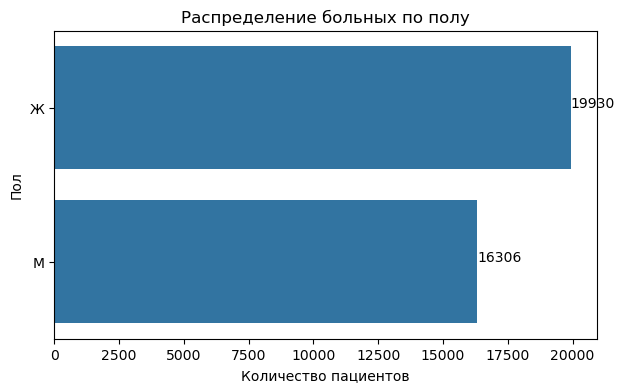

In [47]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.barplot(
    x=project_df['Пол'].value_counts().values,
    y=['Ж', 'М'],
    orient='horizontal',
    ax=ax
)

# Добавляем текст с количеством значений над столбцами
for i, v in enumerate(project_df['Пол'].value_counts().values):
    ax.text(v + 3, i, str(v), color='black', ha='left')

ax.set_title('Распределение больных по полу')
ax.set_xlabel('Количество пациентов')
ax.set_ylabel('Пол')

plt.show();

Выборка почти сбалансирована по представителям обоих полов

## Признак 'Дата рождения пациента'

In [48]:
# Преобразование признака в формат даты.
project_df['Дата рождения пациента'] = pd.to_datetime(project_df['Дата рождения пациента'])

In [49]:
# Функция для высчитывания возраста.
def age(date_of_born: object) -> int: 
    """Функция для извлечения возраста пациента из столбца 'Дата рождения пациента'
    
    Args: 
        значения типа object

    Returns:
       значения типа int
    """
    
    today = date.today() 
    return today.year - date_of_born.year - ((today.month, today.day) < (date_of_born.month, date_of_born.day))

In [50]:
# Применим функцию.
project_df['Возраст'] = project_df['Дата рождения пациента'].apply(age)

# Удалим столбец 'Дата рождения пациента'.
project_df = project_df.drop(labels='Дата рождения пациента', axis=1)

## Оценка данных

In [51]:
# Переименуем столбцы для удобства.
project_df.rename(columns={
    'ID истории болезни': 'ID пациента',
    'Осн. диаг. при выписке МКБ10 (текст)': 'Диагноз',
    'Кол. лаб. показатель': 'Лабораторный показатель',
    'Значение кол. показателя': 'Значение',
    'Ед. изм. кол. показателя': 'Единицы измерения',
    'Норма кол. показателя': 'Референсный интервал',
    'Флаг нормы кол. показателя': 'Результат'
    },
    inplace=True
)

In [52]:
# Результат преобразований.
project_df

,ID пациента,Диагноз,Лабораторный показатель,Значение,Единицы измерения,Референсный интервал,Результат,Пол,Возраст
0,0,Плазмоклеточный лейкоз,WBC,1.80,10*9/л,4:11,Пониж,0,62
1,0,Плазмоклеточный лейкоз,RBC,4.18,10*12/л,"3,8:5,7",Норма,0,62
2,0,Плазмоклеточный лейкоз,HGB,120.00,г/л,117:160,Норма,0,62
3,0,Плазмоклеточный лейкоз,HCT,35.10,%,35:47,Норма,0,62
4,0,Плазмоклеточный лейкоз,MCV,84.00,фл,80:99,Норма,0,62
...,...,...,...,...,...,...,...,...,...
36292,242,Острый лейкоз неуточненного клеточного типа,BA%,1.00,%,0:2,Норма,1,10
36293,242,Острый лейкоз неуточненного клеточного типа,EO,0.00,%,0:5,Норма,1,10
36294,242,Острый лейкоз неуточненного клеточного типа,Atypical cells,0.00,%,0:0,Норма,1,10
36295,242,Острый лейкоз неуточненного клеточного типа,LY,65.00,%,18:44,Повыш,1,10


In [53]:
# Посмотрим информацию о признаках.
project_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36236 entries, 0 to 36296
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID пациента              36236 non-null  int64  
 1   Диагноз                  36236 non-null  object 
 2   Лабораторный показатель  36236 non-null  object 
 3   Значение                 36236 non-null  float64
 4   Единицы измерения        36236 non-null  object 
 5   Референсный интервал     36236 non-null  object 
 6   Результат                36236 non-null  object 
 7   Пол                      36236 non-null  int64  
 8   Возраст                  36236 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ MB


In [54]:
# Выведем кол-во пропущенных значений в каждом признаке.
project_df.isna().sum()

ID пациента                0
Диагноз                    0
Лабораторный показатель    0
Значение                   0
Единицы измерения          0
Референсный интервал       0
Результат                  0
Пол                        0
Возраст                    0
dtype: int64

In [55]:
project_df['Диагноз'].value_counts()

Диагноз
Другой уточненный лейкоз                       24398
Острый миелоидный лейкоз                        6794
Другой миелоидный лейкоз                        1817
Хронический лимфоцитарный лейкоз                1096
Плазмоклеточный лейкоз                           592
Острый лимфобластный лейкоз                      482
Хронический миелоидный лейкоз                    451
Острый миеломоноцитарный лейкоз                  281
Волосатоклеточный лейкоз                         174
Острый лейкоз неуточненного клеточного типа      151
Name: count, dtype: int64

# <center>Выбор таргета</center>

В зависимости от выбора таргетной колонки мы будем заниматься разными задачами. С одной стороны мы можем попробовать выбрать таргетной колонкой колонку `'Диагноз'`, тогда мы будем заниматься задачей предсказания лейкоза. Однако, в наших данных нет здоровых людей, а значит мы не можем обучить модель отличать здоровых от больных. При этом, научить модель определять отдельные типы лейкоза также будет достаточно проблематично, так как больше всего в данных у нас представлен диагноз "Другой уточненный лейкоз", который не является окончательным верифецированным диагнозом. 
Однако все же можно попытаться насинтезировать данные анализов крови для "здоровых" людей и построить модель бинарной классификации: здоров - есть подозрение на лейкоз.

С другой стороны, таргетом мы можем выбрать столбец `"Результат"`, который является итогом анализа показателя: соответсвует от норме или отличается от нее. Конечно, в идеале такой результат проставляется не методами машинного обучения, а путем простого сравнения значения показателя с его нормой. Однако данный таргет является наиболее приближенным к тому, чего хочет заказчик.

In [56]:
data_for_diagnosis = project_df.copy()
data_for_result = project_df.copy()

# <center>Таргет - "Результат"</center>

### Избавление от дубликатов

In [57]:
# Проверяем на дубликаты.
data_for_result.duplicated().sum()

7038

In [58]:
# Избавимся от дубликатов.
data_for_result = data_for_result.drop_duplicates()
data_for_result.shape

(29198, 9)

Было решено выбрать таргетом признак `'Результат'`. В связи с чем:

1) Признак `'ID пациента'` не несёт никакой информации и будет лучше его удалить.

2) Признак `'Диагноз'` будет вносить шум. Т.к. 100% пациентов в таблице с тем или иным диагнозом лейкоза (здоровых нет), несмотря на результаты анализа, т.е. этот диагноз закреплён на ID пациента и остаётся за ним, даже если по анализам у пациента ремиссия, для нас он неинформативен. Также будет удалён.

3) Признак `'Референсный интервал'` лучше разделить на 2 новых признака: `'Верхняя граница`' и `'Нижняя граница'`, а от самого признака избавиться.

4) Обновить информацию в признаке `'Результат'`, т.к. в таблице встречались ошибки, путём сравнения `'Значение'` c 2 новыми признаками (`'Верхняя граница`' и `'Нижняя граница'`) и получить 2 значения в данном признаке: 'Норма' = 0, 'Отклонение' = 1.

In [59]:
# 1) Удаляем 2 неинформативных признака.
data_for_result = data_for_result.drop(labels='ID пациента', axis=1)
data_for_result = data_for_result.drop(labels='Диагноз', axis=1)

In [60]:
# Проверим уникальные значения в признаке 'Референсный интервал'.
data_for_result['Референсный интервал'].unique()

array(['4:11', '3,8:5,7', '117:160', '35:47', '80:99', '27:38', '300:380',
       '150:450', '45:72', '18:44', '1,5:7', '1:3,7', '0,2:0,8', '5:10',
       '10,5:18', '37:54', '0,19:0,36', '9,1:12,6', '9,3:16,7', '2:12',
       '0:5', '0:2', '0,1:0,7', '0:0,4', '0:0,1', '0,8:1,05', '2:20',
       '1:6', '0:0', '6,5:10', '9:17', '4,3:6,1', '132:180', '39:52',
       '10:18', '6,5:12,6', '0,2:2', '17:70', '0,85:1,15', '0:4', '2:10',
       '4,30:6,10', '4,00:11,00', '45,0:72,0', '18,0:44,0 ', '1,50:7,00',
       '1,00:3,70', '0.2:0.8', '_', '0,10:0,70', '0,00:0,40', '0,00:0,10',
       '18,0:44,0', '2,0:12,0', '0,0:5,0', '0,0:2,0', '3,8:6,1',
       '117:180', '35:52', '0:0,7', '0:1', '1:20', '2,0:12,0 ',
       '1,00:3.70', '0,2:2,0', '117:140', '4.0:8.8', '3.5:5.2', '114:154',
       '34:46', '26.5:35.5', '32.2:35.6', '150:320', '41:75', '20:45',
       '7.5:10.0', '15.0:17.0', '3:8', '10.7:45', '4:8,8', '3,5:5,2',
       '26,5:35,5', '32,2:35,6', '7,5:10', '15:17', '10,7:45',
       '0

In [61]:
data_for_result[data_for_result['Референсный интервал'] == '_'].shape

(116, 7)

In [62]:
data_for_result[data_for_result['Референсный интервал'] == 'Общая норма'].shape

(104, 7)

Просмотрев все нормы для разных лабораторных показателей (строка: [121]; код: `all_norms.index.values`), можно сделать вывод, что референсные интервалы одинаковые для всех пациентов только для 2 лабораторных показателей (`'LY#'`, `'NE#'`). В остальных случаях есть несколько интервалов. Как известно, они зависят не только от пола и возраста, но и от аппарата, на котором проводились измерения. А так как мы работаем с медицинскими данными, то ошибок быть не должно. Применять моду для замены значений будет неправильно, следовательно, их нужно удалить.

In [63]:
# Заменяем значения, где можем.
data_for_result.loc[(data_for_result['Лабораторный показатель'] == 'LY#')&(data_for_result['Референсный интервал'] == '_'), 'Референсный интервал'] = '1:3.7'
data_for_result.loc[(data_for_result['Лабораторный показатель'] == 'NE#')&(data_for_result['Референсный интервал'] == '_'), 'Референсный интервал'] = '1.5:7'

In [64]:
# Удаляем неправильные референсыные интервалы.
data_for_result.drop(data_for_result.index[data_for_result['Референсный интервал'] == '_'], inplace=True)
data_for_result.drop(data_for_result.index[data_for_result['Референсный интервал'] == 'Общая норма'], inplace=True)

In [65]:
# Посмотрим, сколько наблюдений было удалено.
data_for_result.shape

(29056, 7)

In [66]:
# 2) Разделяем 'Референсный интервал'.
data_for_result[['Нижняя граница', 'Верхняя граница']] = data_for_result['Референсный интервал'].str.split(':', expand=True)

data_for_result['Нижняя граница'] = data_for_result['Нижняя граница'].str.replace(',', '.')
data_for_result['Верхняя граница'] = data_for_result['Верхняя граница'].str.replace(',', '.')

data_for_result['Нижняя граница'] = data_for_result['Нижняя граница'].astype(float)
data_for_result['Верхняя граница'] = data_for_result['Верхняя граница'].astype(float)

data_for_result = data_for_result.drop(labels='Референсный интервал', axis=1)

In [67]:
# Изменим порядок столбцов, для удобства восприятия.
data_for_result = data_for_result[['Пол', 'Возраст', 'Лабораторный показатель', 'Значение', 'Единицы измерения', 'Нижняя граница', 'Верхняя граница', 'Результат']]
# Изменим индексы на новые.
data_for_result.reset_index(drop=True, inplace=True)

In [68]:
# Проверим исходное кол-во пациентов в группах.
data_for_result['Результат'].value_counts()

Результат
Норма    16662
Пониж     6640
Повыш     5754
Name: count, dtype: int64

In [69]:
# Преобразуем таргетный столбец.
data_for_result['Результат'] = 0
data_for_result.loc[(data_for_result['Значение'] < data_for_result['Нижняя граница']) | (data_for_result['Значение'] > data_for_result['Верхняя граница']), 'Результат'] = 1

In [70]:
# Посмотрим, как изменились группы.
data_for_result['Результат'].value_counts()

Результат
0    16648
1    12408
Name: count, dtype: int64

In [71]:
# Конечный вид датасета.
data_for_result

,Пол,Возраст,Лабораторный показатель,Значение,Единицы измерения,Нижняя граница,Верхняя граница,Результат
0,0,62,WBC,1.80,10*9/л,4.0,11.0,1
1,0,62,RBC,4.18,10*12/л,3.8,5.7,0
2,0,62,HGB,120.00,г/л,117.0,160.0,0
3,0,62,HCT,35.10,%,35.0,47.0,0
4,0,62,MCV,84.00,фл,80.0,99.0,0
...,...,...,...,...,...,...,...,...
29051,1,10,NE%S,2.00,%,45.0,72.0,1
29052,1,10,BA%,1.00,%,0.0,2.0,0
29053,1,10,EO,0.00,%,0.0,5.0,0
29054,1,10,LY,65.00,%,18.0,44.0,1


In [72]:
# Посмотрим информацию о признаках, после преобразований.
data_for_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29056 entries, 0 to 29055
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Пол                      29056 non-null  int64  
 1   Возраст                  29056 non-null  int64  
 2   Лабораторный показатель  29056 non-null  object 
 3   Значение                 29056 non-null  float64
 4   Единицы измерения        29056 non-null  object 
 5   Нижняя граница           29056 non-null  float64
 6   Верхняя граница          29056 non-null  float64
 7   Результат                29056 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 1.8+ MB


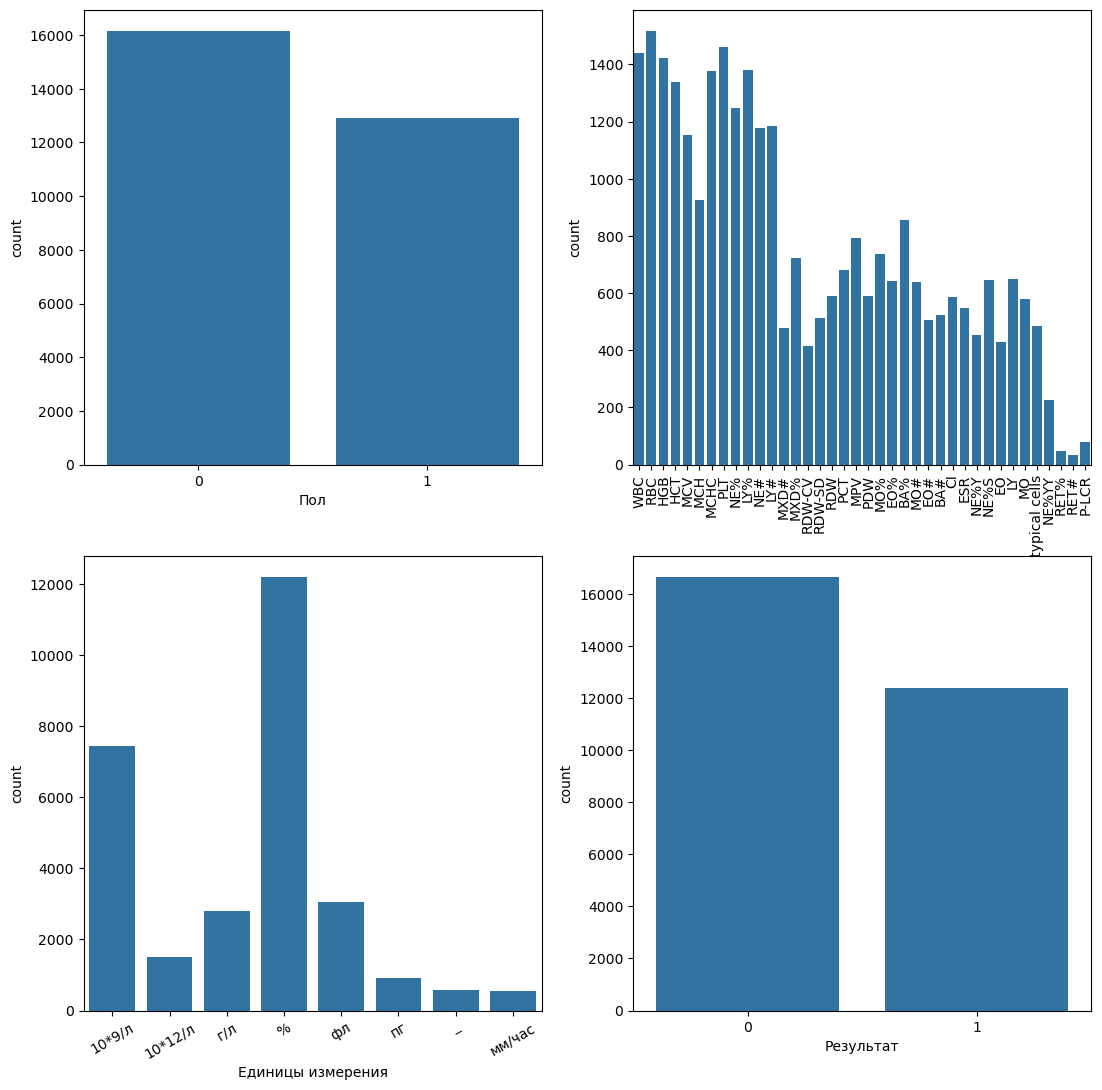

In [73]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 13))

# Countplots для категориальных столбцов.
cat_cols = [['Пол', 'Лабораторный показатель'], ['Единицы измерения', 'Результат']]
for i in range(2):
    for j in range(2):
        sns.countplot(
            data=data_for_result,
            x=cat_cols[i][j], 
            ax=axes[i, j],
        )
axes[1, 0].xaxis.set_tick_params(rotation=30);
axes[0, 1].xaxis.set_tick_params(rotation=90);

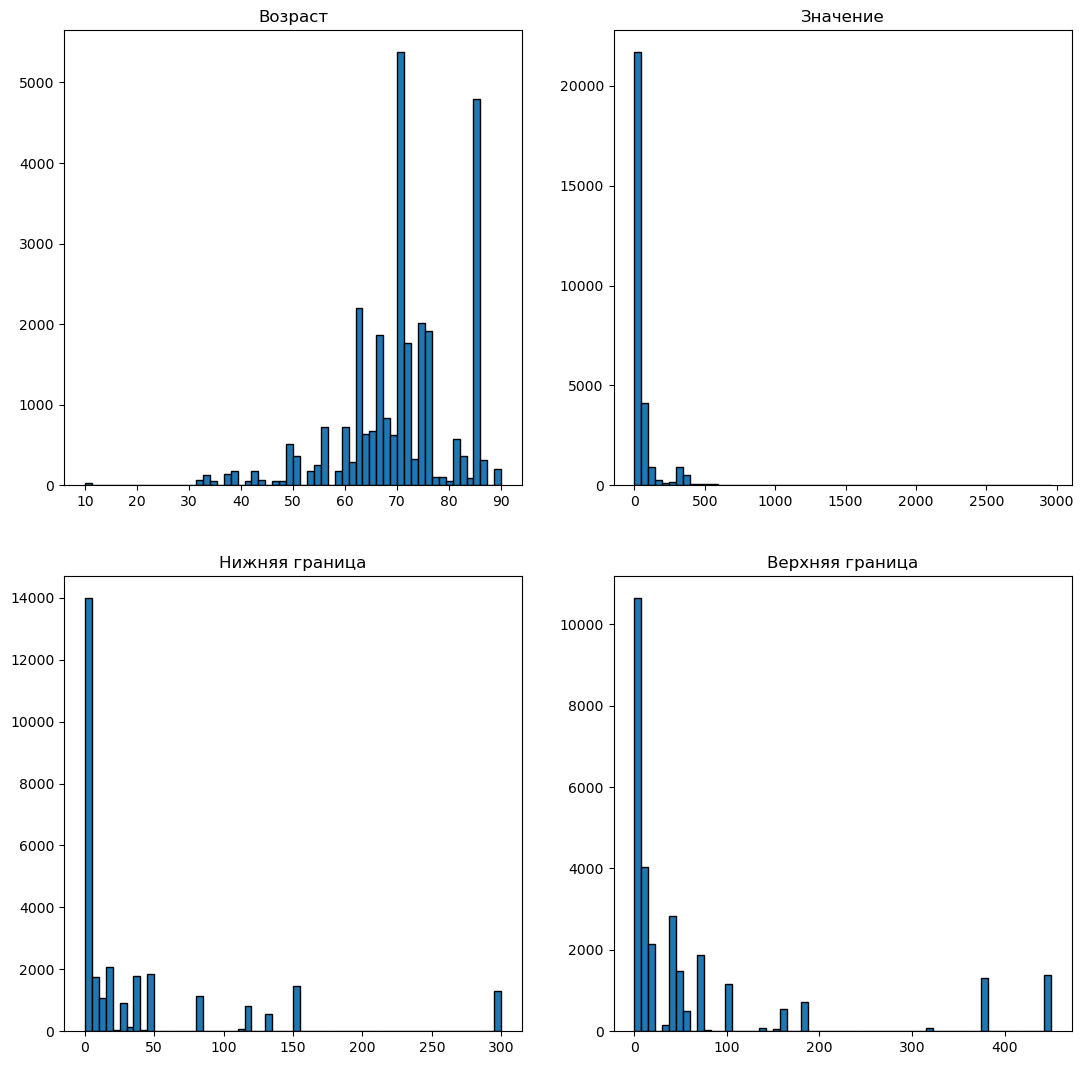

In [74]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 13))

# Гистограммы для числовых столбцов
num_cols = [['Возраст', 'Значение'], ['Нижняя граница', 'Верхняя граница']]
for i in range(2):
    for j in range(2):
        axes[i, j].hist(data_for_result[num_cols[i][j]], bins = 60, edgecolor = 'black')
        axes[i, j].set_title(num_cols[i][j])
        plt.grid()
plt.show()

## Кодирование признаков

In [75]:
# Создаём LabelEncoder и перекодируем признаки типа object.
label_encoder = preprocessing.LabelEncoder()
data_for_result['Лабораторный показатель'] = label_encoder.fit_transform(data_for_result['Лабораторный показатель']) 
data_for_result['Единицы измерения'] = label_encoder.fit_transform(data_for_result['Единицы измерения']) 

In [76]:
# Посмотрим корреляционные зависимости между признаками.
data_for_result.corr().round(2)

,Пол,Возраст,Лабораторный показатель,Значение,Единицы измерения,Нижняя граница,Верхняя граница,Результат
Пол,1.00,-0.24,-0.00,0.01,-0.03,0.02,0.02,-0.03
Возраст,-0.24,1.00,0.03,-0.01,0.02,0.01,0.01,0.07
Лабораторный показатель,-0.00,0.03,1.00,0.07,0.01,-0.02,0.11,0.10
Значение,0.01,-0.01,0.07,1.00,0.19,0.74,0.76,-0.01
Единицы измерения,-0.03,0.02,0.01,0.19,1.00,0.30,0.21,-0.14
Нижняя граница,0.02,0.01,-0.02,0.74,0.30,1.00,0.90,-0.03
Верхняя граница,0.02,0.01,0.11,0.76,0.21,0.90,1.00,0.02
Результат,-0.03,0.07,0.10,-0.01,-0.14,-0.03,0.02,1.00


''

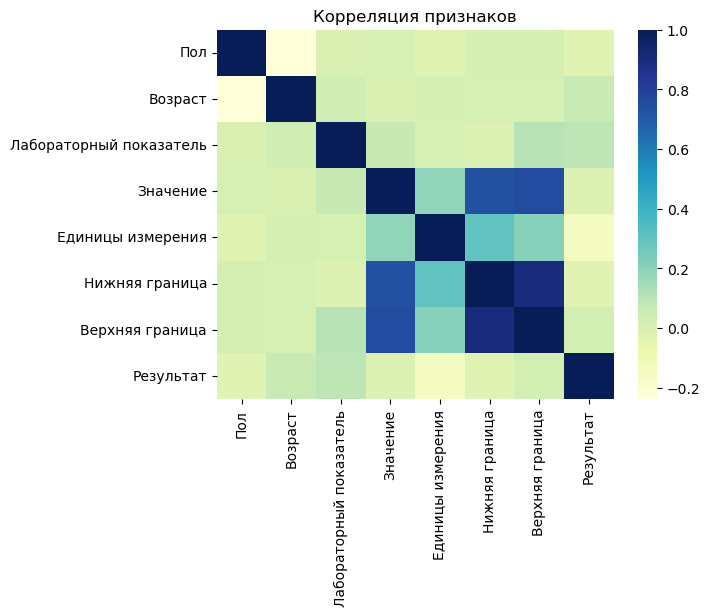

In [77]:
# Визуализируем эту таблицу.
heatmap = sns.heatmap(data=data_for_result.corr(), cmap='YlGnBu')
heatmap.set_title('Корреляция признаков')
;

In [78]:
# Посмотрим признаки, у которых корреляция по абсолютной величине > 0.8.
corr = data_for_result.corr(numeric_only=True).round(3)
m = (corr.mask(np.eye(len(corr), dtype=bool)).abs() > 0.8).any()
raw = corr.loc[m, m]
raw

,Нижняя граница,Верхняя граница
Нижняя граница,1.000,0.903
Верхняя граница,0.903,1.000


In [79]:
# Избавимся от этих признаков.
data_for_result = data_for_result.drop(labels='Нижняя граница', axis=1)
data_for_result = data_for_result.drop(labels='Верхняя граница', axis=1)

## <center>Построение моделей машинного обучения</center>

### Разделение выборки

In [80]:
# Выделим целевой признак в отдельную переменную.
y = data_for_result['Результат']
X = data_for_result.drop('Результат', axis=1)

# Разобьём выборку на обучающую и тестовую.
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.3, 
    random_state=42,
    shuffle=True
)

# Размерности выборок.
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20339, 5), (8717, 5), (20339,), (8717,))

In [81]:
# Посмотрим на соотношение классов в тестовой выборке.
y_test.value_counts(normalize=True).round(3)

Результат
0    0.561
1    0.439
Name: proportion, dtype: float64

### Настройка гиперпараметров моделей

In [82]:
# Настройка гиперпараметров моделей.
model_params = {
    'Logistic_Regression': {
        'model': LogisticRegression(),
        'params': {
            'penalty': ['l1', 'l2', 'elasticnet', 'none'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'multi_class': ['auto', 'ovr', 'multinomial']
        }
    },
    
    'Decision_Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [4, 5, 6, 7, 8, 9, 10], 
            'min_samples_split': [3, 4, 5, 10] 
        }
    },
    
    'Random_Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'max_features': ['sqrt', 'log2'],
            'max_depth': [4, 5, 6, 7, 8],
            'criterion': ['gini', 'entropy']
        }
    }
}

In [83]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [84]:
# Сохраняем результаты.
best_results = pd.DataFrame(scores, columns=['model','best_score','best_params'])
best_results

,model,best_score,best_params
0,Logistic_Regression,0.598899,"{'multi_class': 'auto', 'penalty': 'l2', 'solv..."
1,Decision_Tree,0.939033,"{'criterion': 'entropy', 'max_depth': 10, 'min..."
2,Random_Forest,0.904125,"{'criterion': 'gini', 'max_depth': 8, 'max_fea..."


### Logistic Regression

In [85]:
# Выбираем наилучшие параметры для логистической регрессии.
best_results.best_params[0]

{'multi_class': 'auto', 'penalty': 'l2', 'solver': 'liblinear'}

In [86]:
# Создаём модель.
lg_model = LogisticRegression(solver = 'newton-cg',
                           penalty = 'l2',
                           multi_class = 'multinomial')
lg_model.fit(X_train, y_train)
lg_y_predict = lg_model.predict(X_test)

In [87]:
# Оценка нашей модели.
print('\n-- Logistic Regression --')
f1_score = sklearn.metrics.f1_score(y_test, lg_y_predict)
print('F1-score: {0:.2f}'.format(f1_score))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_test, lg_y_predict))
print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(y_test, lg_y_predict))
print('')


-- Logistic Regression --
F1-score: 0.39
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.81      0.68      4889
           1       0.55      0.30      0.39      3828

    accuracy                           0.58      8717
   macro avg       0.57      0.55      0.54      8717
weighted avg       0.57      0.58      0.55      8717

Confusion Matrix:
[[3943  946]
 [2688 1140]]



### Decision Tree

In [88]:
# Выбираем наилучшие параметры для дерева решений.
best_results.best_params[1]

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5}

In [89]:
# Создаём модель.
dt_model = DecisionTreeClassifier(criterion = 'entropy',
                               max_depth = 10, 
                               min_samples_split = 5)
dt_model.fit(X_train, y_train)
dt_y_predict = dt_model.predict(X_test)

In [90]:
# Оценка нашей модели.
print('\n-- Decision Tree --')
f1_score = sklearn.metrics.f1_score(y_test, dt_y_predict)
print('F1-score: {0:.2f}'.format(f1_score))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_test, dt_y_predict))
print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(y_test, dt_y_predict))
print('')


-- Decision Tree --
F1-score: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      4889
           1       0.97      0.91      0.94      3828

    accuracy                           0.95      8717
   macro avg       0.95      0.95      0.95      8717
weighted avg       0.95      0.95      0.95      8717

Confusion Matrix:
[[4783  106]
 [ 334 3494]]



### Random Forest

In [91]:
# Выбираем наилучшие параметры для случайного леса.
best_results.best_params[2]

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2'}

In [92]:
# Создаём модель.
rf_model = RandomForestClassifier(criterion = 'gini',
                               max_depth = 8, 
                               max_features = 'sqrt')
rf_model.fit(X_train, y_train)
rf_y_predict = rf_model.predict(X_test)

In [93]:
# Оценка нашей модели.
print('\n-- Random Forest --')
f1_score = sklearn.metrics.f1_score(y_test, rf_y_predict)
print('F1-score: {0:.2f}'.format(f1_score))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_test, rf_y_predict))
print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(y_test, rf_y_predict))
print('')


-- Random Forest --
F1-score: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      4889
           1       0.96      0.80      0.87      3828

    accuracy                           0.90      8717
   macro avg       0.91      0.89      0.89      8717
weighted avg       0.90      0.90      0.90      8717

Confusion Matrix:
[[4772  117]
 [ 782 3046]]



### Построение и сравнение confusion matrix

In [94]:
def confusion_matrix_heatmap(y_test, pred, axes):
    """
    Функция confusion_matrix_heatmap() строит heatmap для confusion_matrix по аргументам:
    y_test - тестовые истинные значения
    pred - предсказанные значения модели
    axes - оси, на которых нужно отрисовать хитмеп
    """
    confus_matrix = confusion_matrix(y_test, pred)
    sns.heatmap(confus_matrix, annot=True, ax=axes, fmt='', cmap='Blues')
    axes.set_xlabel('Предсказанное значение')
    axes.set_ylabel('Истинное значение');

Text(0.5, 1.0, 'Матрица ошибок случайного леса')

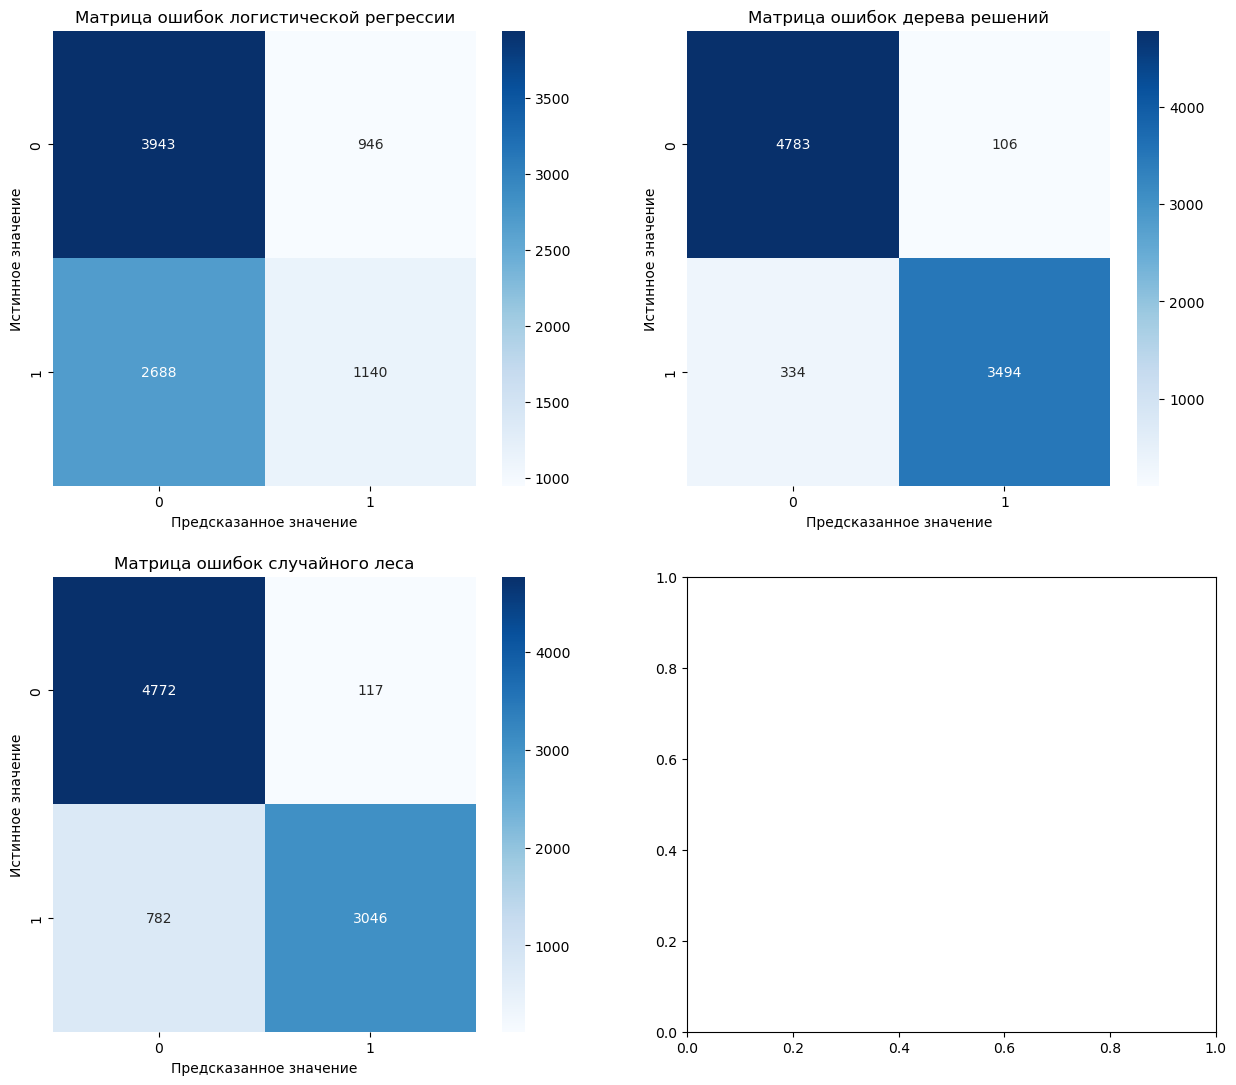

In [95]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 13))
#Строим матрицу ошибок для всех моделей
confusion_matrix_heatmap(y_test, lg_y_predict, axes[0,0])
confusion_matrix_heatmap(y_test, dt_y_predict, axes[0,1])
confusion_matrix_heatmap(y_test, rf_y_predict, axes[1,0])
#Добавляем названия графикам
axes[0,0].set_title('Матрица ошибок логистической регрессии')
axes[0,1].set_title('Матрица ошибок дерева решений')
axes[1,0].set_title('Матрица ошибок случайного леса')

# <center>Таргет - "Диагноз"</center>

## Парсинг данных

In [96]:
data_for_diagnosis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36236 entries, 0 to 36296
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID пациента              36236 non-null  int64  
 1   Диагноз                  36236 non-null  object 
 2   Лабораторный показатель  36236 non-null  object 
 3   Значение                 36236 non-null  float64
 4   Единицы измерения        36236 non-null  object 
 5   Референсный интервал     36236 non-null  object 
 6   Результат                36236 non-null  object 
 7   Пол                      36236 non-null  int64  
 8   Возраст                  36236 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ MB


In [97]:
data_for_diagnosis = data_for_diagnosis.drop(['Единицы измерения', 'Референсный интервал', 'Результат'], axis=1)
data_for_diagnosis.head()

,ID пациента,Диагноз,Лабораторный показатель,Значение,Пол,Возраст
0,0,Плазмоклеточный лейкоз,WBC,1.80,0,62
1,0,Плазмоклеточный лейкоз,RBC,4.18,0,62
2,0,Плазмоклеточный лейкоз,HGB,120.00,0,62
3,0,Плазмоклеточный лейкоз,HCT,35.10,0,62
4,0,Плазмоклеточный лейкоз,MCV,84.00,0,62


In [98]:
# Сортировка датафрейма по столбцу 'ID пациента' с учетом индекса
data_for_diagnosis = data_for_diagnosis.sort_values(by='ID пациента').sort_index()

In [99]:
data_for_diagnosis = data_for_diagnosis.loc[~data_for_diagnosis.duplicated(keep='first') | ~data_for_diagnosis.shift().duplicated(keep='first')]

In [100]:
def create_analysis_column(df):
    current_id = None
    current_values = []
    analysis_number = 1
    analysis_index = []

    for index, row in df.iterrows():
        if row['ID пациента'] != current_id:
            analysis_number += 1
            current_values = []

        if row['Лабораторный показатель'] in current_values:
            analysis_number += 1
            current_values = []

        analysis_index.append(analysis_number)
        current_id = row['ID пациента']
        current_values.append(row['Лабораторный показатель'])

    df.loc[:, 'Analysis_Index'] = analysis_index
    return df

# Применяем функцию к датафрейму
data_for_diagnosis = create_analysis_column(data_for_diagnosis)

data_for_diagnosis.head()

,ID пациента,Диагноз,Лабораторный показатель,Значение,Пол,Возраст,Analysis_Index
0,0,Плазмоклеточный лейкоз,WBC,1.80,0,62,2
1,0,Плазмоклеточный лейкоз,RBC,4.18,0,62,2
2,0,Плазмоклеточный лейкоз,HGB,120.00,0,62,2
3,0,Плазмоклеточный лейкоз,HCT,35.10,0,62,2
4,0,Плазмоклеточный лейкоз,MCV,84.00,0,62,2


In [101]:
# Вытягиваем значения количественных показателей в вектор признаков
pivot_df = data_for_diagnosis.pivot(index='Analysis_Index', columns='Лабораторный показатель', values='Значение')

# Сброс индекса для того, чтобы 'Analysis_Index' остался отдельным столбцом
pivot_df.reset_index(inplace=True)

pivot_df.head()

Лабораторный показатель,Analysis_Index,Atypical cells,BA#,BA%,CI,EO,EO#,EO%,ESR,HCT,...,PCT,PDW,PLT,RBC,RDW,RDW-CV,RDW-SD,RET#,RET%,WBC
0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.1,...,NaN,NaN,51.0,4.18,NaN,20.3,58.7,NaN,NaN,1.80
1,3,11.0,0.02,1.9,0.90,0.0,0.00,0.0,87.0,33.2,...,0.09,13.5,73.0,3.64,20.0,NaN,NaN,NaN,NaN,1.07
2,4,4.0,0.01,0.5,0.89,2.0,0.01,0.5,88.0,36.3,...,0.23,12.9,205.0,4.00,20.5,NaN,NaN,NaN,NaN,1.89
3,5,NaN,0.05,1.1,0.85,0.0,0.02,0.4,112.0,30.2,...,0.14,NaN,147.0,3.37,18.9,NaN,NaN,NaN,NaN,4.97
4,6,NaN,0.06,3.8,0.77,NaN,0.01,0.5,52.0,34.3,...,0.07,NaN,78.0,3.92,17.6,NaN,NaN,NaN,NaN,1.64


In [102]:
pivot_df.shape

(2999, 39)

### Добавление столбцов 'Диагноз' , "Пол", "year", 'ID' к векторам признаков.

In [103]:
# Выбор только нужных столбцов из первого датафрейма
df1_selected_columns = data_for_diagnosis[['Диагноз', 'Пол', 'Возраст', 'ID пациента', 'Analysis_Index']].copy()
df1_selected_columns = df1_selected_columns.loc[~df1_selected_columns.duplicated(keep='first') | \
                                                ~df1_selected_columns.shift().duplicated(keep='first')]

# Удаление дубликатов в df1_selected_columns по столбцу 'Analysis_Index'
df1_selected_columns = df1_selected_columns.drop_duplicates(subset='Analysis_Index')

# Объединение датафреймов
merged_df = pd.merge(df1_selected_columns, pivot_df, how='right', left_on='Analysis_Index', right_on='Analysis_Index')

In [104]:
merged_df.shape

(2999, 43)

## Матрица корреляции

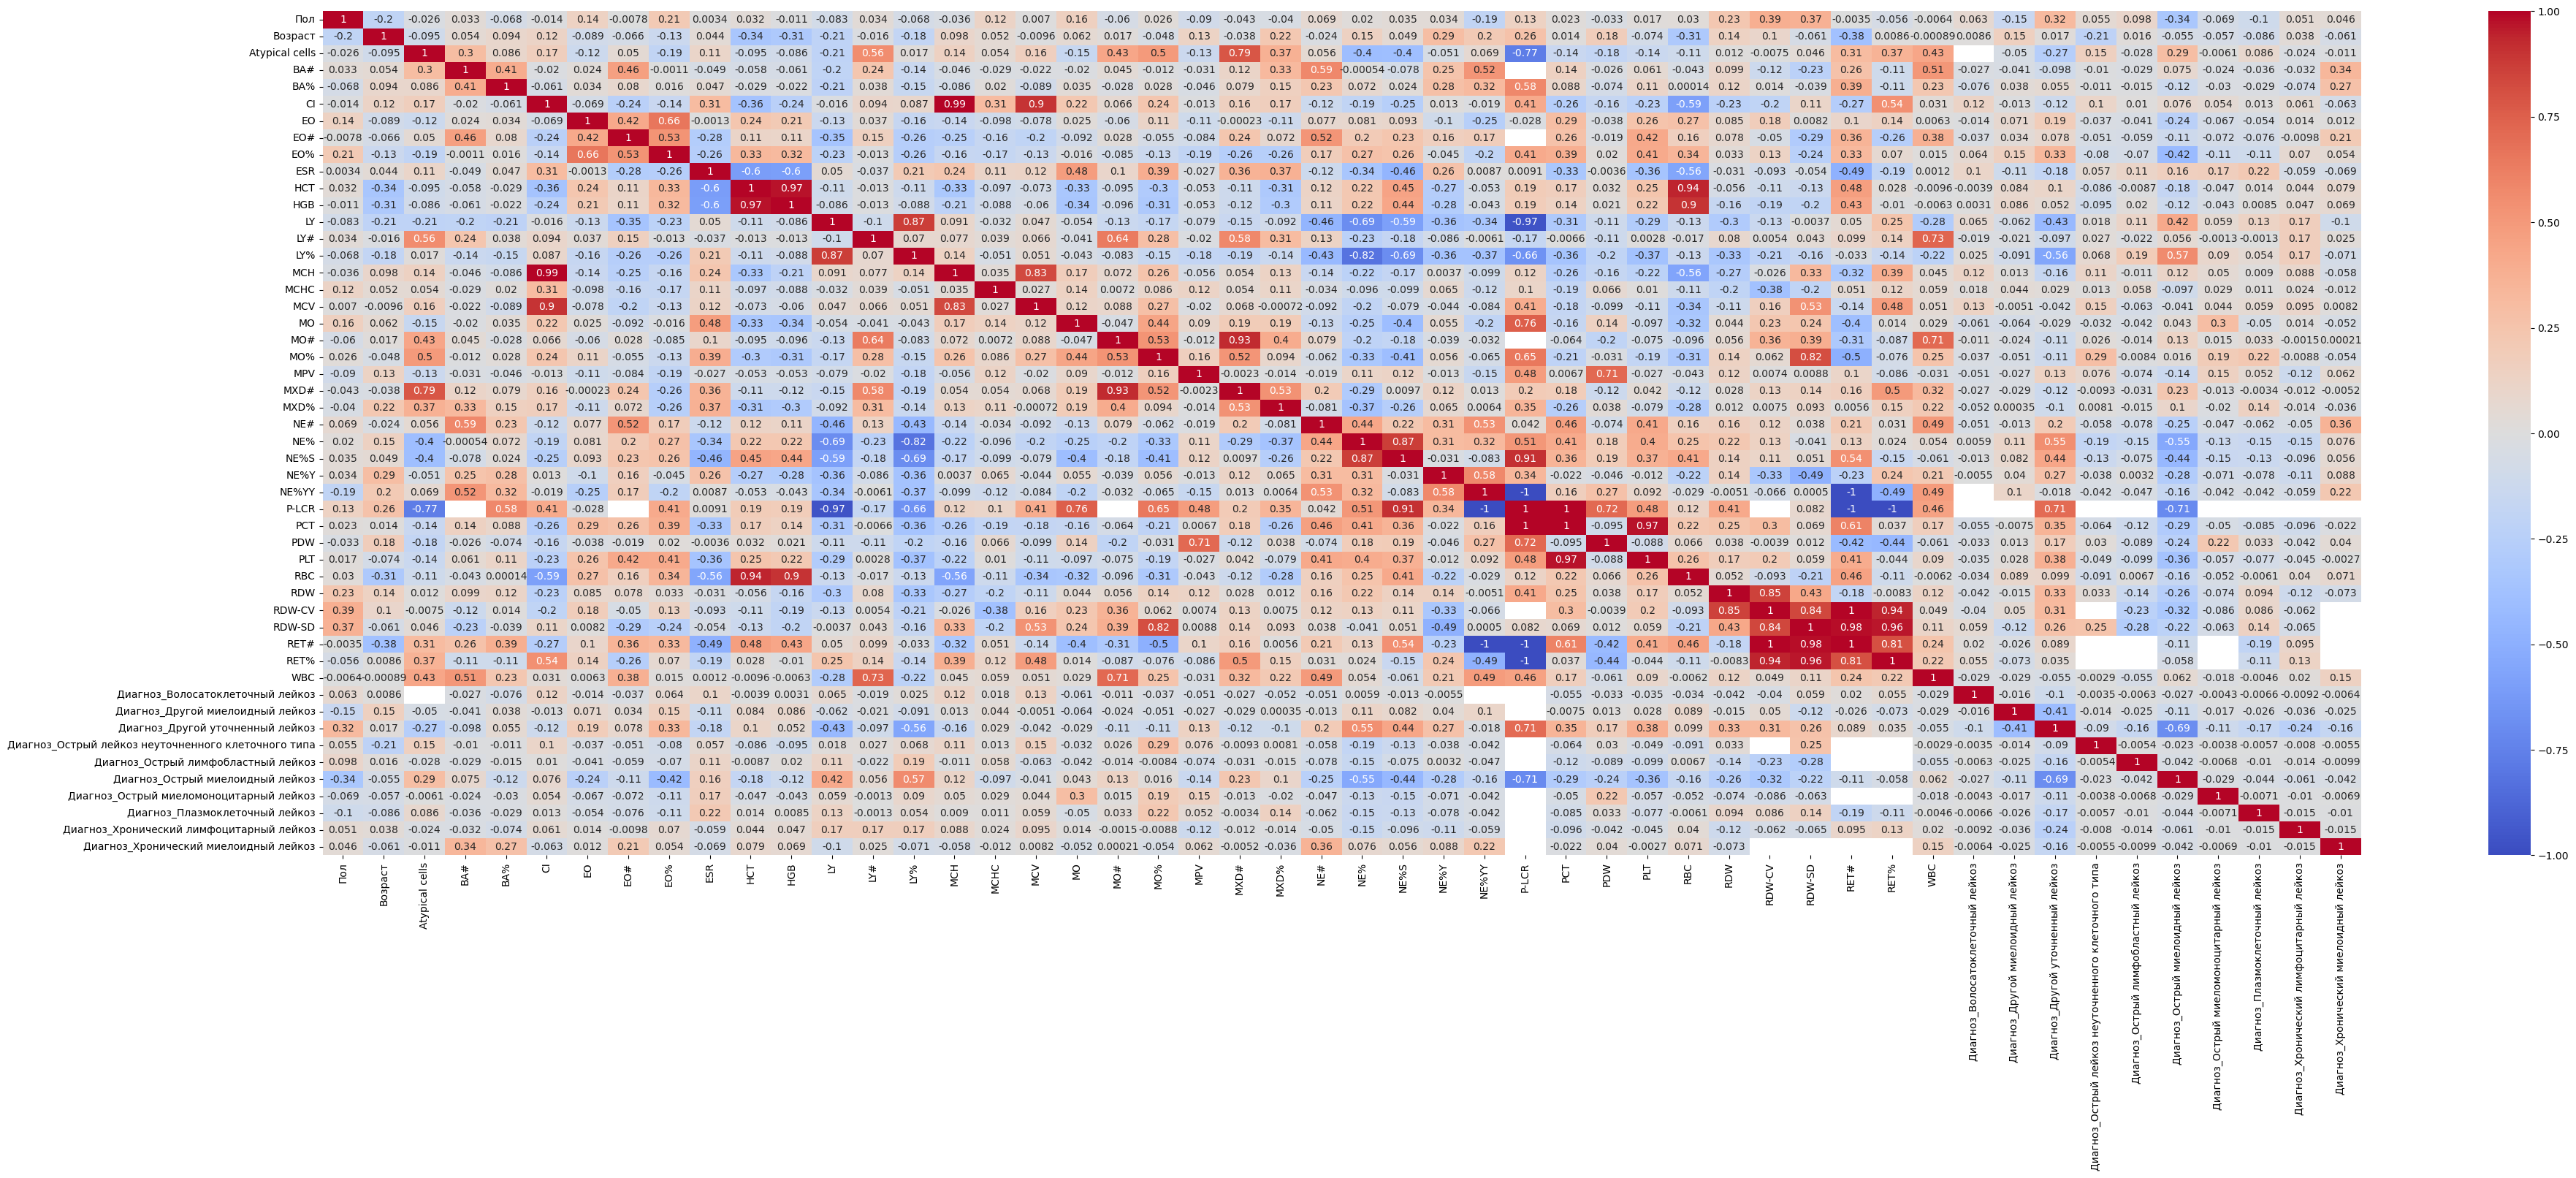

In [105]:
# Удаление незначимых в контексте признаков столбцов
df_for_model = merged_df.drop(['ID пациента', 'Analysis_Index'], axis=1)

# Применяем One-Hot Encoding к столбцу 'Осн. диаг. при выписке МКБ10 (текст)'
df_for_model = pd.get_dummies(df_for_model, columns=['Диагноз'])

# Построение матрицы корреляций
corr_matrix = df_for_model.corr()

# Визуализация матрицы корреляций
plt.figure(figsize=(45, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## Синтез показателей, характерных для нормы

Данные распределения значений для показателей клинического анализа крови взяли из крупного исследования турецкой популяции https://www.jceionline.org/download/the-largest-reference-range-study-for-hematological-parameters-from-turkey-a-case-control-study-3625.pdf

### Удаление лишних столбцов из датафрейма

In [106]:
# Оставляем только показатели для подачи в модель
df_leycosis = df_for_model.loc[:, ['Пол', 'Возраст', 'HGB', 'HCT', 'LY#',
       'MCH', 'MCHC', 'MCV', 'MO#', 'NE#', 'PLT', 'RBC', 'WBC']]

# Добавляем столбец таргет (1 - есть лейкоз, 2 - нет лейкоза)
df_leycosis['target'] = 1

df_leycosis.head()

,Пол,Возраст,HGB,HCT,LY#,MCH,MCHC,MCV,MO#,NE#,PLT,RBC,WBC,target
0,0,62,120.0,35.1,0.90,28.7,342.0,84.0,NaN,0.50,51.0,4.18,1.80,1
1,0,62,109.0,33.2,0.58,29.9,328.0,91.2,0.24,0.23,73.0,3.64,1.07,1
2,0,62,118.0,36.3,0.62,29.5,325.0,90.8,0.30,0.95,205.0,4.00,1.89,1
3,0,62,96.0,30.2,0.42,28.5,318.0,89.6,0.23,4.25,147.0,3.37,4.97,1
4,0,62,101.0,34.3,0.96,25.8,295.0,87.5,0.28,0.33,78.0,3.92,1.64,1


In [107]:
df_leycosis.describe()

,Пол,Возраст,HGB,HCT,LY#,MCH,MCHC,MCV,MO#,NE#,PLT,RBC,WBC,target
count,2999.000000,2999.000000,1575.000000,1510.000000,1398.000000,1256.000000,1455.000000,1446.000000,727.000000,1267.000000,1539.000000,1582.000000,1559.000000,2999.0
mean,0.503168,71.236412,105.958921,32.025762,1.968069,28.695223,319.938763,84.790180,1.847428,5.355217,284.294997,3.812130,9.863303,1.0
std,0.500073,11.134112,30.999583,10.600459,4.730219,3.558431,70.108171,9.427175,12.323893,6.208452,313.677884,1.414661,18.388051,0.0
min,0.000000,10.000000,34.000000,9.000000,0.100000,16.200000,24.400000,59.900000,0.000000,0.000000,0.000000,1.100000,0.000000,1.0
25%,0.000000,66.000000,85.000000,24.300000,0.900000,27.400000,319.000000,79.025000,0.210000,2.500000,61.000000,2.890000,3.865000,1.0
50%,1.000000,71.000000,102.000000,30.000000,1.400000,28.600000,336.000000,83.000000,0.410000,4.230000,201.000000,3.540000,6.640000,1.0
75%,1.000000,76.000000,124.000000,38.000000,2.100000,30.000000,349.000000,88.900000,0.840000,6.475000,403.000000,4.400000,10.290000,1.0
max,1.000000,90.000000,220.000000,71.700000,137.900000,45.100000,404.000000,136.300000,239.930000,105.700000,2958.000000,10.580000,294.770000,1.0


In [108]:
# Количество столбцов в датасете
num_columns = len(df_leycosis.columns)

# Порог для удаления строк
threshold = int(num_columns * 0.3)  # 30% пропусков допустимы, более 70% — удаляем

# Удаление строк с более чем 70% пропусков
df_cleaned = df_leycosis.dropna(thresh=threshold+1)  # +1 для учета корректного подсчета

# Размер датасета
df_cleaned.shape

(1946, 14)

In [109]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1946 entries, 0 to 2995
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Пол      1946 non-null   int64  
 1   Возраст  1946 non-null   int64  
 2   HGB      1570 non-null   float64
 3   HCT      1509 non-null   float64
 4   LY#      1393 non-null   float64
 5   MCH      1255 non-null   float64
 6   MCHC     1435 non-null   float64
 7   MCV      1445 non-null   float64
 8   MO#      693 non-null    float64
 9   NE#      1233 non-null   float64
 10  PLT      1484 non-null   float64
 11  RBC      1578 non-null   float64
 12  WBC      1463 non-null   float64
 13  target   1946 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 228.0 KB


### Определение параметров для здоровых лиц

Т.к. мы не нашли подходящих данных со средним значением и стандартным отклонением для абсолютных значений фракции лейкоцитов, пришлось сделать допущение и пересчитать данные из таблици проценты в абсолютные значения. Так делать не корректно, но за неимением лучшых данных пришлось выполнить данное преобразование, т.к. автоматический синтез данных в % выдаст некорректные значения, либо будет излишне сложен.

In [110]:
# Определение параметров для нормальных показателей в мужской популяции
HGB_mean_M =  152.7
HGB_std_M = 9.2

RBC_mean_M = 5.25
RBC_std_M = 0.37

HCT_mean_M = 44.92
HCT_std_M = 2.49

MCV_mean_M = 86.65
MCV_std_M = 4.54

MCH_mean_M = 29.11
MCH_std_M = 1.7

MCHC_mean_M = 33.99
MCHC_std_M = 0.99

WBC_mean_M = 6.78
WBC_std_M = 1.53

NE_mean_M = 3.72
NE_std_M = 0.52

LY_mean_M = 2.29
LY_std_M = 0.47

MO_mean_M = 0.54
MO_std_M = 0.12

EO_mean_M = 0.2
EO_std_M = 0.13

BA_mean_M = 0.03
BA_std_M = 0.02

PLT_mean_M = 238.5
PLT_std_M = 46.95


# Определение параметров для нормальных показателей в женской популяции
HGB_mean_F =  128.8
HGB_std_F = 9.2

RBC_mean_F = 4.52
RBC_std_F = 0.36

HCT_mean_F = 39.01
HCT_std_F = 2.51

MCV_mean_M = 85.56
MCV_std_M = 5.36

MCH_mean_M = 28.58
MCH_std_M = 2.09

MCHC_mean_M = 33.01
MCHC_std_M = 1.03

WBC_mean_F = 6.88
WBC_std_F = 1.78

NE_mean_M = 4.03
NE_std_M = 0.61

LY_mean_M = 2.15
LY_std_M = 0.55

MO_mean_M = 0.51
MO_std_M = 0.12

EO_mean_M = 0.15
EO_std_M = 0.12

BA_mean_M = 0.03
BA_std_M = 0.02

PLT_mean_F = 255.9
PLT_std_F = 55.33

In [111]:
# Заполнение пропусков датасета с лейкозами значениями нормы.
df_cleaned['HGB'] = df_cleaned['HGB'].fillna(HGB_mean_M)
df_cleaned['RBC'] = df_cleaned['RBC'].fillna(RBC_mean_M)
df_cleaned['HCT'] = df_cleaned['HCT'].fillna(HCT_mean_M)
df_cleaned['MCV'] = df_cleaned['MCV'].fillna(MCV_mean_M)
df_cleaned['MCH'] = df_cleaned['MCH'].fillna(MCH_mean_M)
df_cleaned['MCHC'] = df_cleaned['MCHC'].fillna(MCHC_mean_M)
df_cleaned['WBC'] = df_cleaned['WBC'].fillna(WBC_mean_M)
df_cleaned['NE#'] = df_cleaned['NE#'].fillna(NE_mean_M)
df_cleaned['LY#'] = df_cleaned['LY#'].fillna(LY_mean_M)
df_cleaned['MO#'] = df_cleaned['MO#'].fillna(MO_mean_M)
df_cleaned['PLT'] = df_cleaned['PLT'].fillna(PLT_mean_M)

In [112]:
df_cleaned['MCHC'] = df_cleaned['MCHC'].apply(lambda x: x*0.1 if x>100 else x)
df_cleaned

,Пол,Возраст,HGB,HCT,LY#,MCH,MCHC,MCV,MO#,NE#,PLT,RBC,WBC,target
0,0,62,120.0,35.1,0.90,28.70,34.2,84.0,0.51,0.50,51.0,4.18,1.80,1
1,0,62,109.0,33.2,0.58,29.90,32.8,91.2,0.24,0.23,73.0,3.64,1.07,1
2,0,62,118.0,36.3,0.62,29.50,32.5,90.8,0.30,0.95,205.0,4.00,1.89,1
3,0,62,96.0,30.2,0.42,28.50,31.8,89.6,0.23,4.25,147.0,3.37,4.97,1
4,0,62,101.0,34.3,0.96,25.80,29.5,87.5,0.28,0.33,78.0,3.92,1.64,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991,1,42,45.0,15.0,2.55,39.00,31.0,126.0,10.99,0.21,37.0,1.15,13.77,1
2992,1,42,56.0,17.0,2.60,35.90,33.7,106.0,5.30,0.04,25.0,1.56,7.97,1
2993,1,42,49.0,13.0,8.01,28.58,37.0,106.0,0.92,0.17,24.0,1.24,9.65,1
2994,1,42,65.0,19.0,2.88,34.80,34.2,102.0,4.98,0.01,23.0,1.87,7.90,1


### Генерация данных с использованием нормального распределения

In [113]:
# Определение параметров для мужской популяции
params_male = {
    'HGB': (152.7, 9.2),
    'RBC': (5.25, 0.37),
    'HCT': (44.92, 2.49),
    'MCV': (86.65, 4.54),
    'MCH': (29.11, 1.7),
    'MCHC': (33.99, 0.99),
    'WBC': (6.78, 1.53),
    'NE': (3.72, 0.52),
    'LY': (2.29, 0.47),
    'MO': (0.54, 0.12),
    'EO': (0.2, 0.13),
    'BA': (0.03, 0.02),
    'PLT': (238.5, 46.95)
}

# Определение параметров для женской популяции
params_female = {
    'HGB': (128.8, 9.2),
    'RBC': (4.52, 0.36),
    'HCT': (39.01, 2.51),
    'MCV': (85.56, 5.36),
    'MCH': (28.58, 2.09),
    'MCHC': (33.01, 1.03),
    'WBC': (6.88, 1.78),
    'NE': (4.03, 0.61),
    'LY': (2.15, 0.55),
    'MO': (0.51, 0.12),
    'EO': (0.15, 0.12),
    'BA': (0.03, 0.02),
    'PLT': (255.9, 55.33)
}

# Генерация синтетических данных
def generate_synthetic_data(params, size=100, gender_value=0):
    data = {}
    for param, (mean, std) in params.items():
        data[param] = np.random.normal(mean, std, size)
    data['Пол'] = [gender_value] * size
    data['year'] = np.random.randint(1934, 1975, size)
    return pd.DataFrame(data)

# Генерация данных для мужчин (Пол = 0) и женщин (Пол = 1)
df_male = generate_synthetic_data(params_male, size=1000, gender_value=0)
df_female = generate_synthetic_data(params_female, size=1000, gender_value=1)

# Объединение данных в один DataFrame
df_healthy = pd.concat([df_male, df_female], ignore_index=True)

df_healthy.head()

,HGB,RBC,HCT,MCV,MCH,MCHC,WBC,NE,LY,MO,EO,BA,PLT,Пол,year
0,149.400743,5.132079,47.231108,74.545596,27.193667,34.799435,5.255074,3.638656,2.406427,0.553193,0.180149,0.011699,277.456310,0,1945
1,165.345623,5.488065,41.707253,83.499454,30.394904,32.685454,7.425556,4.196054,1.884417,0.575863,0.188394,0.043638,222.432323,0,1969
2,150.791678,4.824135,49.891972,93.684292,29.049527,34.081990,10.824625,3.547670,2.451346,0.557720,0.255170,0.037633,296.796768,0,1944
3,153.452842,5.230533,43.690770,78.844955,26.197949,34.018698,2.454690,3.403396,2.228950,0.797043,0.368403,0.045671,228.719358,0,1971
4,143.891124,5.241788,46.045659,84.864874,30.959906,33.755276,6.524008,4.164606,2.762101,0.558156,0.143482,0.038195,224.424620,0,1940


In [114]:
# Добавляем столбец таргет (1 - есть лейкоз, 2 - нет лейкоза)
df_healthy['target'] = 0

In [115]:
# Объединение датасета с лейкозом и синтетического датасетов
df_ml = pd.concat([df_cleaned, df_healthy], ignore_index=True)

In [116]:
# Перемешивание строк
df_shuffled = df_ml.sample(frac=1).reset_index(drop=True)

## Создание и обучение модели случайного леса

In [117]:
# Разделение данных на признаки и целевую переменную
X = df_shuffled.drop('target', axis=1)
y = df_shuffled['target']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
# Создание и обучение модели случайного леса
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [119]:
# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

# Подробный отчет по классификации
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       412
           1       1.00      1.00      1.00       378

    accuracy                           1.00       790
   macro avg       1.00      1.00      1.00       790
weighted avg       1.00      1.00      1.00       790



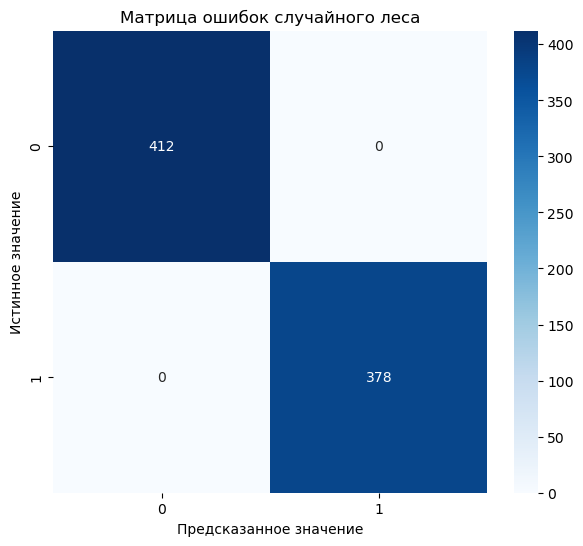

In [120]:
fig = plt.figure(figsize=(7, 6))
heatmap = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='', cmap='Blues')
heatmap.set_xlabel('Предсказанное значение')
heatmap.set_ylabel('Истинное значение');

#Добавляем названия графикам
heatmap.set_title('Матрица ошибок случайного леса')   ;